# Ejercicio 5 y Ejercicio 6
# Práctica 3
# Javier Francisco Castilla Jiménez

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import NeuralFunctJC as nrn

In [2]:
plt.style.use('Solarize_Light2')

In [3]:
llaves=['A','B','C','D','E']
amplitudes=['0','6','8','10','12','24']

In [4]:
NeuDetS1A=nrn.importar('Neu_Det_S1A.csv')
NeuDetS1B=nrn.importar('Neu_Det_S1B.csv')
NeuDetS1C=nrn.importar('Neu_Det_S1C.csv')
NeuDetS1D=nrn.importar('Neu_Det_S1D.csv')
NeuDetS1E=nrn.importar('Neu_Det_S1E.csv')
Neurons={'A':NeuDetS1A,'B':NeuDetS1B,'C':NeuDetS1C,'D':NeuDetS1D,'E':NeuDetS1E}

In [5]:
bqA=list((nrn.bloques(nrn.abrir('Neu_Det_S1A.csv'))))
bqB=list((nrn.bloques(nrn.abrir('Neu_Det_S1B.csv'))))
bqC=list((nrn.bloques(nrn.abrir('Neu_Det_S1C.csv'))))
bqD=list((nrn.bloques(nrn.abrir('Neu_Det_S1D.csv'))))
bqE=list((nrn.bloques(nrn.abrir('Neu_Det_S1E.csv'))))
bqs={'A':bqA,'B':bqB,'C':bqC,'D':bqD,'E':bqE}

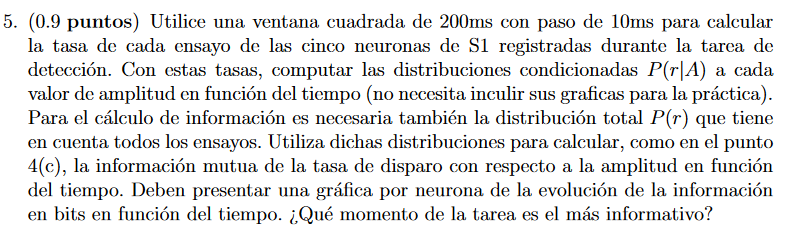

In [6]:
def dicneuronrate(dictneu,keyneuron,start=-2,stop=3.5,paso=0.01,ventana=0.2,nv=True):
    """
    Esta función crea un diccionario donde las claves son los nombres de las neuronas y los valores
    son las tasas de disparo de cada neurona. 
    keyneurons:son las claves/llaves de cada neurona. Es una lista. o tupla.
    dictneu:es un diccionario dónde las llaves son keyneurons y los valores son los 
    datos crudos de todos los ensayos de una neurona
    salida es un diccionario."""
    Tns={clave:0 for clave in keyneuron}
    bsup,nven=nrn.bordesup(start,stop,paso,ventana,nv=True) 
    func=lambda ensayo : nrn.tasa(ensayo,nventanas=nven,paso=paso,ventana=ventana,start=start)# esta función calcula la tasa de disparo de un ensayo nventanas, paso=0.01,ventana=0.05,start=-2 
    for llave in keyneuron:
        fr=map(func,dictneu[llave]) # array con las tasas de disparo para cada ventana
        Tns[llave]=np.array(list(fr))
    return Tns

In [7]:
Tns1=dicneuronrate(Neurons,llaves)

In [8]:
def txclases(tasas,keyneuron,keyclases,bqs):
    """tasas"""
    #tasas de disparo separadas por amplitud del estímulo en un diccionario de diccionarios
    Txclases={a:0 for a in keyneuron}
    for llave in keyneuron:
        bloques=nrn.clases(tasas[llave],bqs[llave])
        clases={keyclases[i]:bloques[i] for i in range(len(keyclases))}
        Txclases[llave]=clases
    return Txclases

In [9]:
txclas=txclases(Tns1,llaves,amplitudes,bqs)

In [10]:
def mMv2(Tasaxc,keys):
    """solo tiene dos parametros de entrada la tasa en un diccionario donde 
    las claves son correponden a neuronas y las claves """
    minymax={e:0 for e in keys}
    for llave in keys:
        dat=Tasaxc[llave].values()
        dat=tuple([e for e in dat])
        datos=np.concatenate(dat)
        m,M=(np.min(datos),np.max(datos))
        minymax[llave]=(m,M)
    return minymax

In [11]:
def mM(Tasa,keys):
    """solo tiene dos parametros de entrada la tasa en un diccionario donde 
    las claves son correponden a neuronas y las claves """
    minymax={e:0 for e in keys}
    for llave in keys:
        m,M=(np.min(Tasa[llave]),np.max(Tasa[llave]))
        minymax[llave]=(m,M)
    return minymax

In [12]:
minymax=mM(Tns1,llaves)
minymax2=mMv2(txclas,llaves)

In [13]:
def Probabilidades(Txclases,Tns,bines,keyclases,keyneuron):
    """
    Esta función sirve para calcular distribuciones de probabilidad de las tasas de disparo y las
    disribuciones de probabilidad de las tasas de disparo condicionadas al estímulo en toda la tarea.
    Txclases: es un diccionario de diccionarios, donde las claves de cada neuronas tienen asignado un
    diccionario con las las claves para cada clase y cada clave de clase tiene asignado las tasas de disparo 
    de esa neurona que corresponden a esa clase
    Tns: es un diccionario donde las claves de cada neurona tienen asignado un array donde cada fila son las tasas
    disparo de un ensayo a cada ventan
    bines: el número de bines que tendrán nuestras distribuciones de probabilidad
    keyclases: son las llaves/claves de cada clase
    keyneuron: son las llaves/claves de cada neurona"""
    llaves=keyneuron # las llaves de que corresponden a cada neurona
    minymax=mM(Tns,llaves)# los valores minimos y máximos que puede tomar la tasa de cada neurona sirven para limitar el bineo en el rango entre el min y el máx
    keycmt=list(keyclases)+['dtotal'] # las llaves de las clases más la llave 'dtotal'
    ProbArc={a:0 for a in keyneuron}# creo diccionario que tiene las llaves de clase + la llave dtotal
    for neuron in llaves: # itero para cada neurona
        AG={a:0 for a in keycmt}
        total=[]
        for clase in keyclases:
            counts, bins=np.histogram(Txclases[neuron][clase],bins=bines,range=minymax[neuron]) #count guarda un array con la frecuencia y bins un array con los bordes de bins
            counts=counts/counts.sum() #convertimos la frecuencia en probabilidad (frecuencia relativa)
            AG[clase]=[bins,counts]
    #calculamos bines y probabilidades de la ddistribución total:
        total=np.concatenate(tuple(Tns[neuron]))
        counts, bins=np.histogram(total,bins=bines,range=minymax[neuron]) #count guarda un array con la frecuencia y bins un array con los bordes de bins
        counts=counts/counts.sum() #convertimos la frecuencia en probabilidad
        AG['dtotal']=[bins,counts]
        ProbArc[neuron]=AG# diccionario de diccionarios 
    return ProbArc
    

In [14]:
def probaventana(Txclases,Tns,bines,keyclases,keyneuron):
    """
    Esta función sirve para calcular distribuciones de probabilidad de las tasas de disparo a cada tiempo/ventana 
    y las disribuciones de probabilidad de las tasas de disparo condicionadas al estímulo a cada tiempo/ventana
    Los parametros de entrada son:
    Txclases: es un diccionario de diccionarios, donde las claves de cada neuronas tienen asignado un
    diccionario con las las claves para cada clase y cada clave de clase tiene asignado las tasas de disparo 
    de esa neurona que corresponden a esa clase
    Tns: es un diccionario donde las claves de cada neurona tienen asignado un array donde cada fila son las tasas
    disparo de un ensayo a cada ventan
    bines: el número de bines que tendrán nuestras distribuciones de probabilidad
    keyclases: son las llaves/claves de cada clase
    keyneuron: son las llaves/claves de cada neurona"""
    llaves=keyneuron
    minymax=mM(Tns,llaves)
    keycmt=list(keyclases)+['dtotal']
    ProbArc={a:0 for a in keyneuron}
    nv=len(Txclases[keyneuron[0]][keyclases[0]][0])
    for neuron in llaves:
        AG={a:0 for a in keycmt}
        total=[]
        for clase in keyclases:
            pvamp=[]
            for v in range(nv):
                counts, bins=np.histogram(Txclases[neuron][clase][:,v],bins=bines,range=minymax[neuron]) #count guarda un array con la frecuencia y bins un array con los bordes de bins
                counts=counts/counts.sum() #convertimos la frecuencia en probabilidad (frecuencia relativa)
                pvamp.append(counts)
            AG[clase]=pvamp
    #calculamos bines y probabilidades de la ddistribución total:
        pvtotales=[]
        for v in range(nv):
            total=np.stack(tuple(Tns[neuron]))[:,v]
            counts, bins=np.histogram(total,bins=bines,range=minymax[neuron]) #count guarda un array con la frecuencia y bins un array con los bordes de bins
            counts=counts/counts.sum() #convertimos la frecuencia en probabilidad
            pvtotales.append(counts)
        
        AG['dtotal']=pvtotales
        ProbArc[neuron]=AG# diccionario de diccionarios 
    return ProbArc

In [15]:
llaves2=['0','6','8','10','12','24','dtotal']

In [16]:
ProbArc2=probaventana(txclas,Tns1,3,amplitudes,llaves)

In [17]:
def I_shanon(data,keys,ps):
    """data es los datos correspondientes a un archivo, keys=son las llaves de los estímulos
    ps=probabilidad de aparición del estímulo
    ptasa=probabilidad de la tasa
    pcondicionada= probabilidad de la tasa condicionada al estímulo"""
    llaves=keys[0:len(keys)-1]
    ptasa=data[keys[-1]]
    Info_stim=[]
    for llave in llaves:
        pcondicionada=data[llave]
        Is=np.nansum(pcondicionada*np.log2(pcondicionada/ptasa))
        Info_stim.append(Is)
    Ish=ps*np.sum(np.array(Info_stim))
    return Ish

In [18]:
bsup,nven=nrn.bordesup(start=-2,stop=3.5,paso=0.01,ventana=0.2,nv=True) 

In [19]:
def I_shanonxv(data,ctotal,clase,ps,v):
    """data es los datos correspondientes a una neurona, 
    total= es la llave que uso para las probabilidades de tasa totales de una neurona, es decir,las no condicionadas a ningún estímulo 
    ps=probabilidad de aparición del estímulo
    ptasa=probabilidad de la tasa
    pcondicionada= probabilidad de la tasa condicionada al estímulo
    v: ventana"""
    ptasa=data[ctotal][v] # es igual a : data['dtotal']
    pcondicionada=data[clase][v]
    Info_stim=np.nansum(pcondicionada*np.log2(pcondicionada/ptasa))
    Ish=ps*Info_stim
    return Ish

In [20]:
def I_mutuaxvent(dicprobas,keyclases,keyneuron,ps,nv,ctotal='dtotal'):
    """"Párametros de entrada:dicprobas: es un diccionario de diccionarios donde las claves de neurona tienen de value diccionarios donde las claves de amplitud tiene las probabilidades de las distribución de probabilidad de cada ventana 
    keyclases: son las claves de cada clases
    keyneuron: son las claves de cada neurona
    ps: son las probabilidades que tiene cada tipo de estímulo de ocurrir(dado el diseño experimental) es un diccionario donde las claves son las clases
    nv:es el número de ventanas que a las que calculamos las tasa de disparo y la distribución de probabilidad"""
    #keycmt=list(keyclases)+[ctotal] # es una lista con las claves de clase extendidas con un 'dtotal'
    #Info_mutua={n:0 for n in keyneuron} #es un diccionario de información mutua con claves por neurona
    Info_mutua=dict() #Crea diccionario vacío. # es un diccionario con donde las claves son las clases más dtotal y los values son cero
    for neuron in keyneuron:# iteramos un ciclo por neurona :5 neuronas
        Itotal_v=[]#es una lista vacía para almacenar arrays con la info de cada clase por ventana para después calcular el total por neurona por ventana al sumar las info de cada clase ventana a ventana
        I_clases=dict() # es un diccionario vacio que se convertira en un diccionario con claves por amplitud y 'dtotal' para almacenar los arrays con los valores de info por ventana, los values son ceros para poder asignar el array de infos de clase ventana a ventana
        for clase in keyclases:# itero un ciclo por cada clase :6 clases
            shanoncv=np.zeros(nv)# este array de zeros servirá para almacenar la info por ventana de una clase tendrá 531 elementos uno por ventana
            for v in range(nv):#nv un ciclo por número de ventana :531 ventanas
                info=I_shanonxv(dicprobas[neuron],ctotal,clase,ps[clase],v)# cálcula la info de shanon de una ventana particular 
                shanoncv[v]=info# vamos almacenando la info de cada ventana hasta junta la info # al final del último ciclo for de ventanas shanoncv tiene la info de todas las ventanas de una clase (de una neurona)
            Itotal_v.append(shanoncv)#al final de cada ciclo de clase agrego la lista de la info de las ventanas de esa clase a Itotal_v
            I_clases.update({clase:shanoncv})#agrego clave y valor a diccionario las claves son las clases y los valores son arrays con la info por ventana de un clase 
        I_v=np.sum(np.stack(Itotal_v),axis=0) # cálculo de la info total por ventanas de un ensayo
        I_clases.update({'dtotal':I_v}) # asignamos a d
        Info_mutua.update({neuron: I_clases}) #solo está pegando el array que corresponde a la última neurona en todas las neuronas #ERROR
    return Info_mutua

In [21]:
amprob={'0':0.5,'6':1/5,'8':1/5,'10':1/5,'12':1/5,'24':1/5}
chanon=I_mutuaxvent(ProbArc2,amplitudes,llaves,amprob,nven)

<ipython-input-19-15bc8b3ffe7e>:10: RuntimeWarning: invalid value encountered in true_divide
  Info_stim=np.nansum(pcondicionada*np.log2(pcondicionada/ptasa))
<ipython-input-19-15bc8b3ffe7e>:10: RuntimeWarning: divide by zero encountered in log2
  Info_stim=np.nansum(pcondicionada*np.log2(pcondicionada/ptasa))
<ipython-input-19-15bc8b3ffe7e>:10: RuntimeWarning: invalid value encountered in multiply
  Info_stim=np.nansum(pcondicionada*np.log2(pcondicionada/ptasa))


El valor máximo de info_mutua de Shanon de la neurona A es: 0.6755384135180189
Para la neurona A: 0.21 s es el momento más informativo


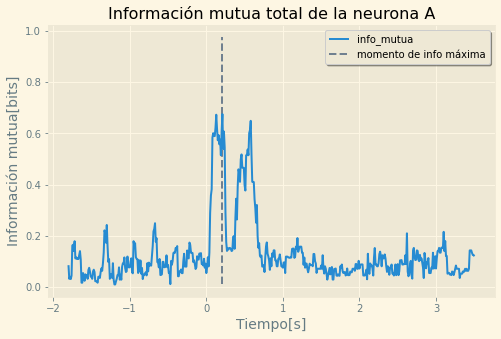

El valor máximo de info_mutua de Shanon de la neurona B es: 1.2572850894838383
Para la neurona B: 0.44 s es el momento más informativo


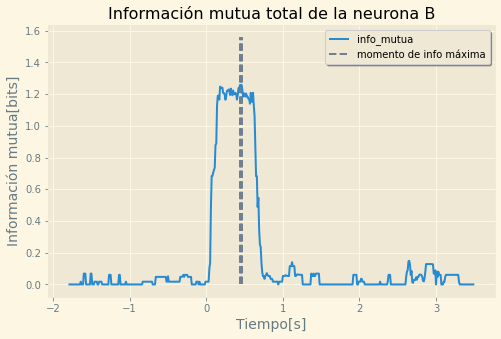

El valor máximo de info_mutua de Shanon de la neurona C es: 1.0399313502813854
Para la neurona C: 0.18 s es el momento más informativo


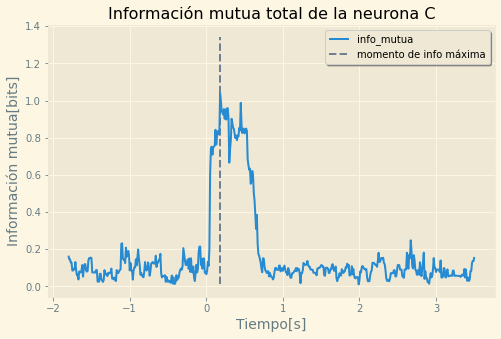

El valor máximo de info_mutua de Shanon de la neurona D es: 1.5226070340433022
Para la neurona D: 0.29 s es el momento más informativo


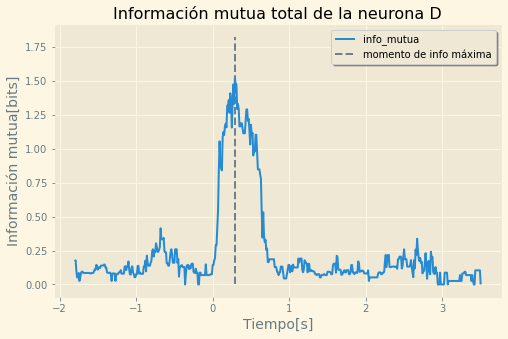

El valor máximo de info_mutua de Shanon de la neurona E es: 0.5793799992575631
Para la neurona E: 0.19 s es el momento más informativo


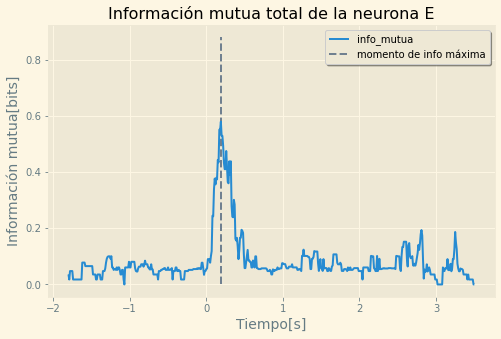

In [22]:
for neuron in llaves:
    y=chanon[neuron]['dtotal']
    maximo=np.max(y)
    minimo=np.min(y)
    t_maxinfo=bsup[np.nonzero(y==maximo)]
    print('El valor máximo de info_mutua de Shanon de la neurona '+neuron+' es:',maximo) 
    print('Para la neurona '+neuron+':',t_maxinfo[0],'s es el momento más informativo')
    fig = plt.figure(figsize=(8,5))
    plt.plot(bsup,y,label='info_mutua')
    plt.vlines(t_maxinfo,minimo,maximo+0.3,ls="--",color="slategray",label="momento de info máxima")
    plt.xlabel("Tiempo[s]",fontsize=14)
    plt.ylabel("Información mutua[bits]",fontsize=14)
    plt.title("Información mutua total de la neurona "+neuron)
    plt.legend(fontsize="medium",shadow=True,fancybox=True)
    plt.show()

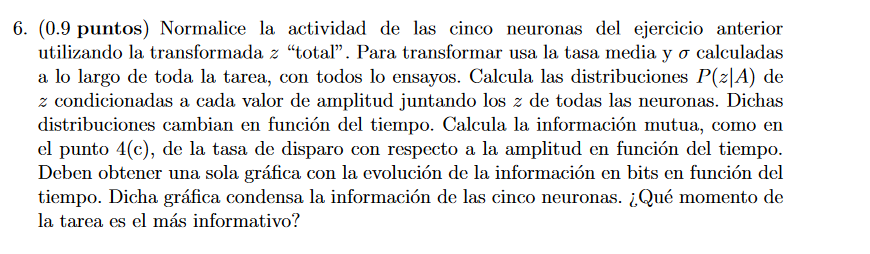

In [26]:
Tns1['A']

array([[50., 45., 55., ..., 50., 45., 45.],
       [65., 70., 70., ..., 40., 40., 45.],
       [45., 45., 55., ..., 65., 65., 65.],
       ...,
       [30., 30., 25., ..., 30., 30., 30.],
       [85., 85., 90., ...,  5.,  5.,  5.],
       [20., 20., 20., ..., 55., 55., 55.]])

In [27]:
def zscoreTotal(tasa):
    media=np.mean(tasa)
    sigma=np.std(tasa)
    print(media,sigma)
    z=(tasa-media)/sigma
    return z

In [28]:
zs=dict()# diccionario vacio
for neuron in llaves:
    z=zscoreTotal(Tns1[neuron]) # cada z corresponde un array de z-score dónde cada fila es un ensayo y cada columna un ventana temporal. En este caso el número de ensayos varía según la neurona pero el número de ventanas es 531
    zs.update({neuron:z})# agrego un par llave:valor al diccionario de z por neurona
    #zsc[llave]=nrn.clases(zs[llave],bqs[llave])

42.77900188323917 25.941260457181745
38.1033498830109 29.87718572532174
45.92744773535734 31.83492492962756
35.83073333895494 30.20810817449331
6.236850615381689 8.577992681003487


In [30]:
len(zs['A'])

100

In [30]:
amplitudes

['0', '6', '8', '10', '12', '24']

In [31]:
zxclas=txclases(zs,llaves,amplitudes,bqs)

In [43]:
ztot=dict()
for amp in amplitudes:
    z_juntadoc=[zxclas[neuron][amp] for neuron in llaves]
    z_jc=np.vstack(z_juntadoc)
    ztot.update({amp:z_jc})

In [1]:
def zto(zxclas,keyneuron,keydivision):
    zto=dict()
    for amp in keydivision:
        z_juntadoc=[zxclas[neuron][amp] for neuron in keyneuron]
        z_jc=np.vstack(z_juntadoc)
        zto.update({amp:z_jc})
    return zto

In [45]:
Todoztot=[ztot[amp] for amp in amplitudes]
Z_one=np.vstack(Todoztot)

In [34]:
def z_one(ztotal,clases):
    Todoztot=[ztotal[amp] for amp in clases]
    Zeta_one=np.vstack(Todoztot)
    return Zeta_one

In [35]:
Z_one=z_one(ztot,amplitudes)

In [36]:
Z_one

array([[ 0.27835957,  0.08561643,  0.47110271, ...,  0.27835957,
         0.08561643,  0.08561643],
       [ 0.85658899,  1.04933213,  1.04933213, ..., -0.10712671,
        -0.10712671,  0.08561643],
       [ 0.08561643,  0.08561643,  0.47110271, ...,  0.85658899,
         0.85658899,  0.85658899],
       ...,
       [-0.72707577, -0.72707577, -0.72707577, ..., -0.14418882,
        -0.14418882, -0.14418882],
       [-0.72707577, -0.72707577, -0.72707577, ..., -0.72707577,
        -0.72707577, -0.72707577],
       [-0.14418882, -0.14418882, -0.14418882, ..., -0.72707577,
        -0.72707577, -0.72707577]])

In [37]:
def mM_one(datos):
    """solo tiene dos parametros de entrada la tasa en un diccionario donde 
    las claves son correponden a neuronas y las claves """
    m,M=(np.min(datos),np.max(datos))
    return m,M

In [38]:
mM_one(Z_one)

(-1.6490718311027928, 7.433341546889622)

In [39]:
def P_ventana_Tn(Txclases,Tns,bines,keyclases):
    """
    Esta función sirve para calcular distribuciones de probabilidad de las tasas de disparo a cada tiempo/ventana 
    y las disribuciones de probabilidad de las tasas de disparo condicionadas al estímulo a cada tiempo/ventana
    Los parametros de entrada son:
    Txclases: es un diccionario de diccionarios, donde las claves de cada neuronas tienen asignado un
    diccionario con las las claves para cada clase y cada clave de clase tiene asignado las tasas de disparo 
    de esa neurona que corresponden a esa clase
    Tns: es un diccionario donde las claves de cada neurona tienen asignado un array donde cada fila son las tasas
    disparo de un ensayo a cada ventan
    bines: el número de bines que tendrán nuestras distribuciones de probabilidad
    keyclases: son las llaves/claves de cada clase"""
    minymax=mM_one(Tns)
    keycmt=list(keyclases)+['dtotal']
    nv=len(Txclases[keyclases[0]][0])
    AG=dict()
    total=[]
    for clase in keyclases:
        pvamp=[]
        for v in range(nv):
            counts, bins=np.histogram(Txclases[clase][:,v],bins=bines,range=minymax) #count guarda un array con la frecuencia y bins un array con los bordes de bins
            counts=counts/counts.sum() #convertimos la frecuencia en probabilidad (frecuencia relativa)
            pvamp.append(counts)
        AG.update({clase:pvamp})
    #calculamos bines y probabilidades de la ddistribución total:
    pvtotales=[]
    for v in range(nv):
        total=np.stack(tuple(Tns))[:,v]
        counts, bins=np.histogram(total,bins=bines,range=minymax) #count guarda un array con la frecuencia y bins un array con los bordes de bins
        counts=counts/counts.sum() #convertimos la frecuencia en probabilidad
        pvtotales.append(counts)
        
    AG.update({'dtotal':pvtotales})
    return AG

In [40]:
probas=P_ventana_Tn(ztot,Z_one,10,amplitudes)

In [41]:
def I_one(dicprobas,keyclases,ps,nv,ctotal='dtotal'):
    """"Párametros de entrada:dicprobas: es un diccionario de diccionarios donde las claves de neurona tienen de value diccionarios donde las claves de amplitud tiene las probabilidades de las distribución de probabilidad de cada ventana 
    keyclases: son las claves de cada clases
    ps: son las probabilidades que tiene cada tipo de estímulo de ocurrir(dado el diseño experimental) es un diccionario donde las claves son las clases
    nv:es el número de ventanas que a las que calculamos las tasa de disparo y la distribución de probabilidad"""
    keycmt=list(keyclases)+[ctotal] # es una lista con las claves de clase extendidas con un 'dtotal'
    cl={clave:0 for clave in keycmt} # es un diccionario con donde las claves son las clases más dtotal y los values son cero
    Itotal_v=[]#es una lista vacía para almacenar arrays con la info de cada clase por ventana para después calcular el total por neurona por ventana al sumar las info de cada clase ventana a ventana
    I_clases=dict() # es un diccionario vacio que se convertira en un diccionario con claves por amplitud y 'dtotal' para almacenar los arrays con los valores de info por ventana, los values son ceros para poder asignar el array de infos de clase ventana a ventana
    for clase in keyclases:# itero un ciclo por cada clase :6 clases
        shanoncv=np.zeros(nv)# este array de zeros servirá para almacenar la info por ventana de una clase tendrá 531 elementos uno por ventana
        for v in range(nv):#nv un ciclo por número de ventana :531 ventanas
            info=I_shanonxv(dicprobas,ctotal,clase,ps[clase],v)# cálcula la info de shanon de una ventana particular 
            shanoncv[v]=info# vamos almacenando la info de cada ventana hasta junta la info # al final del último ciclo for de ventanas shanoncv tiene la info de todas las ventanas de una clase (de una neurona)
        Itotal_v.append(shanoncv)#al final del ciclo de clase agrego la lista de la info de las ventanas de esa clase a Itotal_v
        I_clases.update({clase:shanoncv})#agrego clave y valor a diccionario las claves son las clases y los valores son arrays con la info por ventana de un clase 
    I_v=np.sum(np.stack(Itotal_v),axis=0) # cálculo de la info total por ventanas de un ensayo
    I_clases.update({'dtotal':I_v}) # asignamos a d
    return I_clases

In [42]:
chanonz=I_one(probas,amplitudes,amprob,nven)

<ipython-input-22-15bc8b3ffe7e>:10: RuntimeWarning: invalid value encountered in true_divide
  Info_stim=np.nansum(pcondicionada*np.log2(pcondicionada/ptasa))
<ipython-input-22-15bc8b3ffe7e>:10: RuntimeWarning: divide by zero encountered in log2
  Info_stim=np.nansum(pcondicionada*np.log2(pcondicionada/ptasa))
<ipython-input-22-15bc8b3ffe7e>:10: RuntimeWarning: invalid value encountered in multiply
  Info_stim=np.nansum(pcondicionada*np.log2(pcondicionada/ptasa))


El valor máximo de info_mutua de Shanon las neuronas usando z total es: 0.9282200354731014
Para la neuronas  0.2 s es el momento más informativo


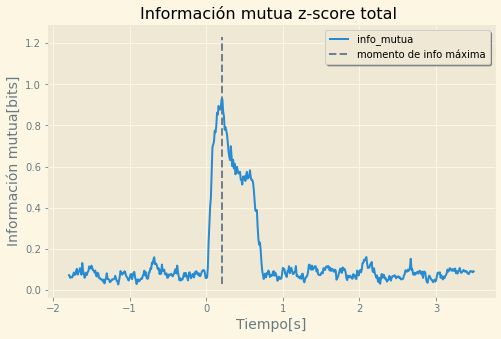

In [43]:
y=chanonz['dtotal']
maximo=np.max(y)
minimo=np.min(y)
t_maxinfo=bsup[np.nonzero(y==maximo)]
print('El valor máximo de info_mutua de Shanon las neuronas usando z total es:',maximo) 
print('Para la neuronas ',t_maxinfo[0],'s es el momento más informativo')
fig = plt.figure(figsize=(8,5))
plt.plot(bsup,y,label='info_mutua')
plt.vlines(t_maxinfo,minimo,maximo+0.3,ls="--",color="slategray",label="momento de info máxima")
plt.xlabel("Tiempo[s]",fontsize=14)
plt.ylabel("Información mutua[bits]",fontsize=14)
plt.title("Información mutua z-score total ")
plt.legend(fontsize="medium",shadow=True,fancybox=True)
plt.show()